In [1]:
import numpy as np
from netCDF4 import Dataset
import os
import datetime
import xarray as xr
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import pyart #This will be replaced by cmweather in the future
import act
import glob

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/pyart/io/nexrad_level3.py:72: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from xdrlib import Unpacker


In [4]:
ds_ingested = act.io.read_netcdf('/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202308250000.nc')

Lets see what we have

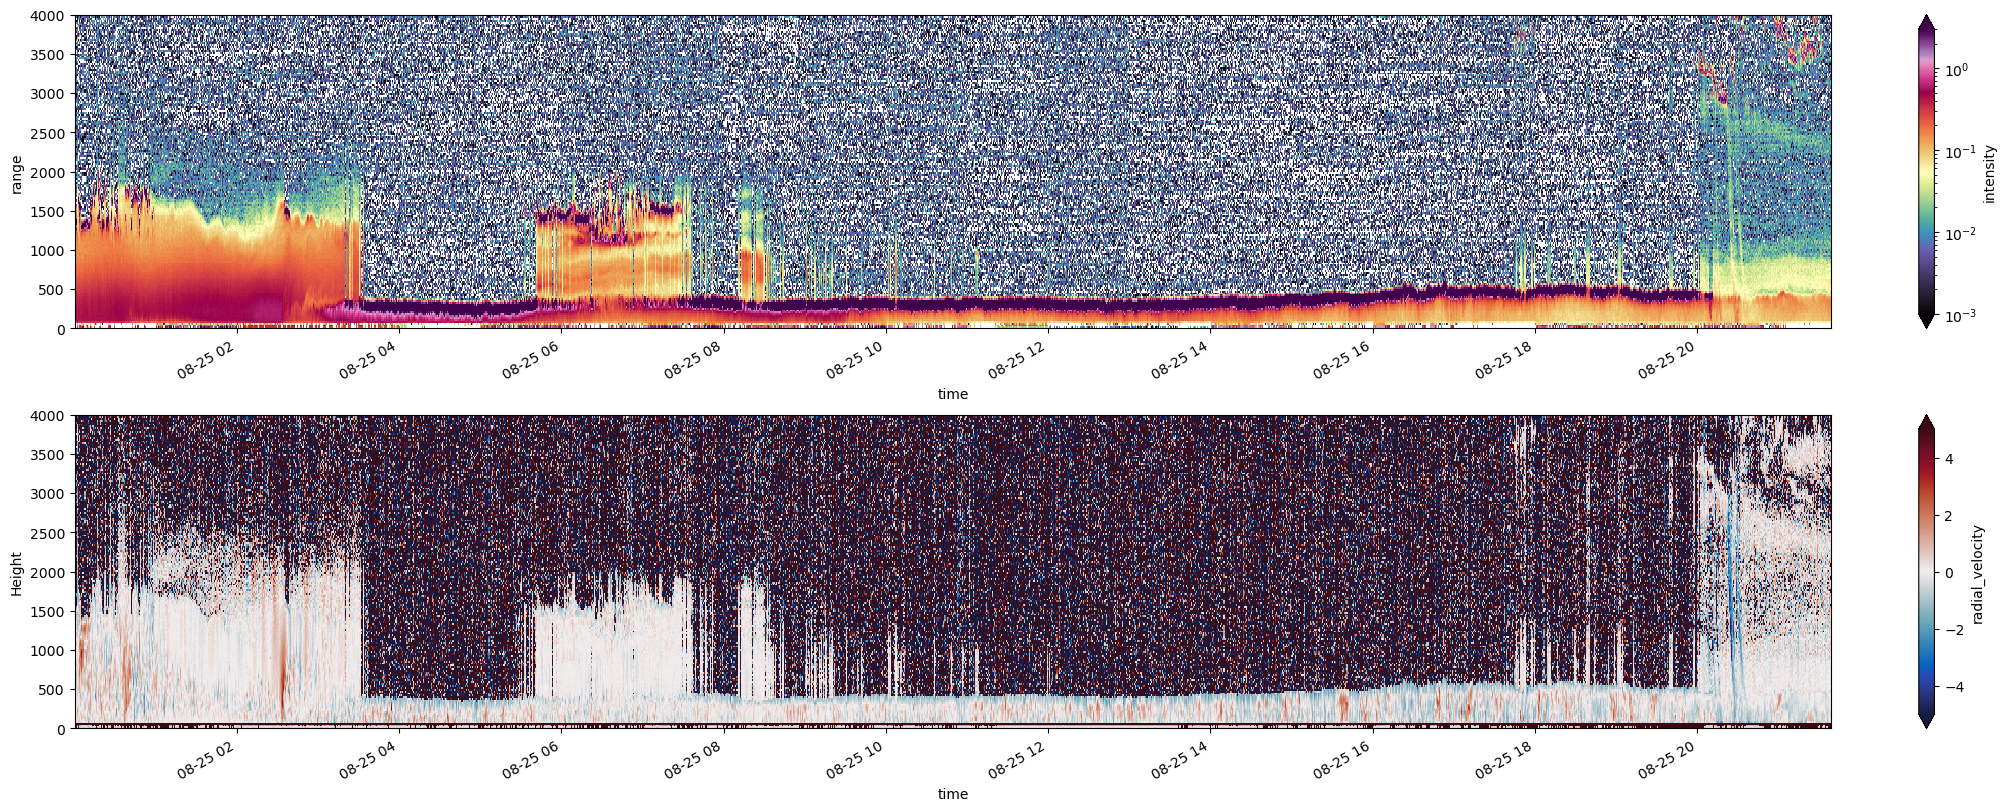

In [5]:

#Optional time ranges
time1 = None#pd.Timestamp("2023-06-27 12:00:00")
time2 = None#pd.Timestamp("2023-06-27 20:00:00")

#Top of atmosphere
toa = 4000.0

#What ranges for Doppler Velocity
vrange = 5
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[20,8], constrained_layout=True)

#Units in the DL data are odd..
(ds_ingested.intensity -1.).plot.pcolormesh(norm=LogNorm(vmax=3, vmin=0.001),
                                     cmap=pyart.graph.cm_colorblind.ChaseSpectral, ax=axs[0])


plt.ylabel("Height")
axs[0].set_ylim([0,toa])
axs[0].set_xlim([time1, time2])

ds_ingested.radial_velocity.sortby(ds_ingested.time).plot.pcolormesh( cmap=pyart.graph.cm_colorblind.balance, 
                                                                   vmin=-vrange, vmax=vrange, ax=axs[1])
axs[1].set_ylim([0,toa])
axs[1].set_xlim([time1, time2])

plt.ylabel("Height")
plt.savefig('/Users/scollis/dllatest.png')

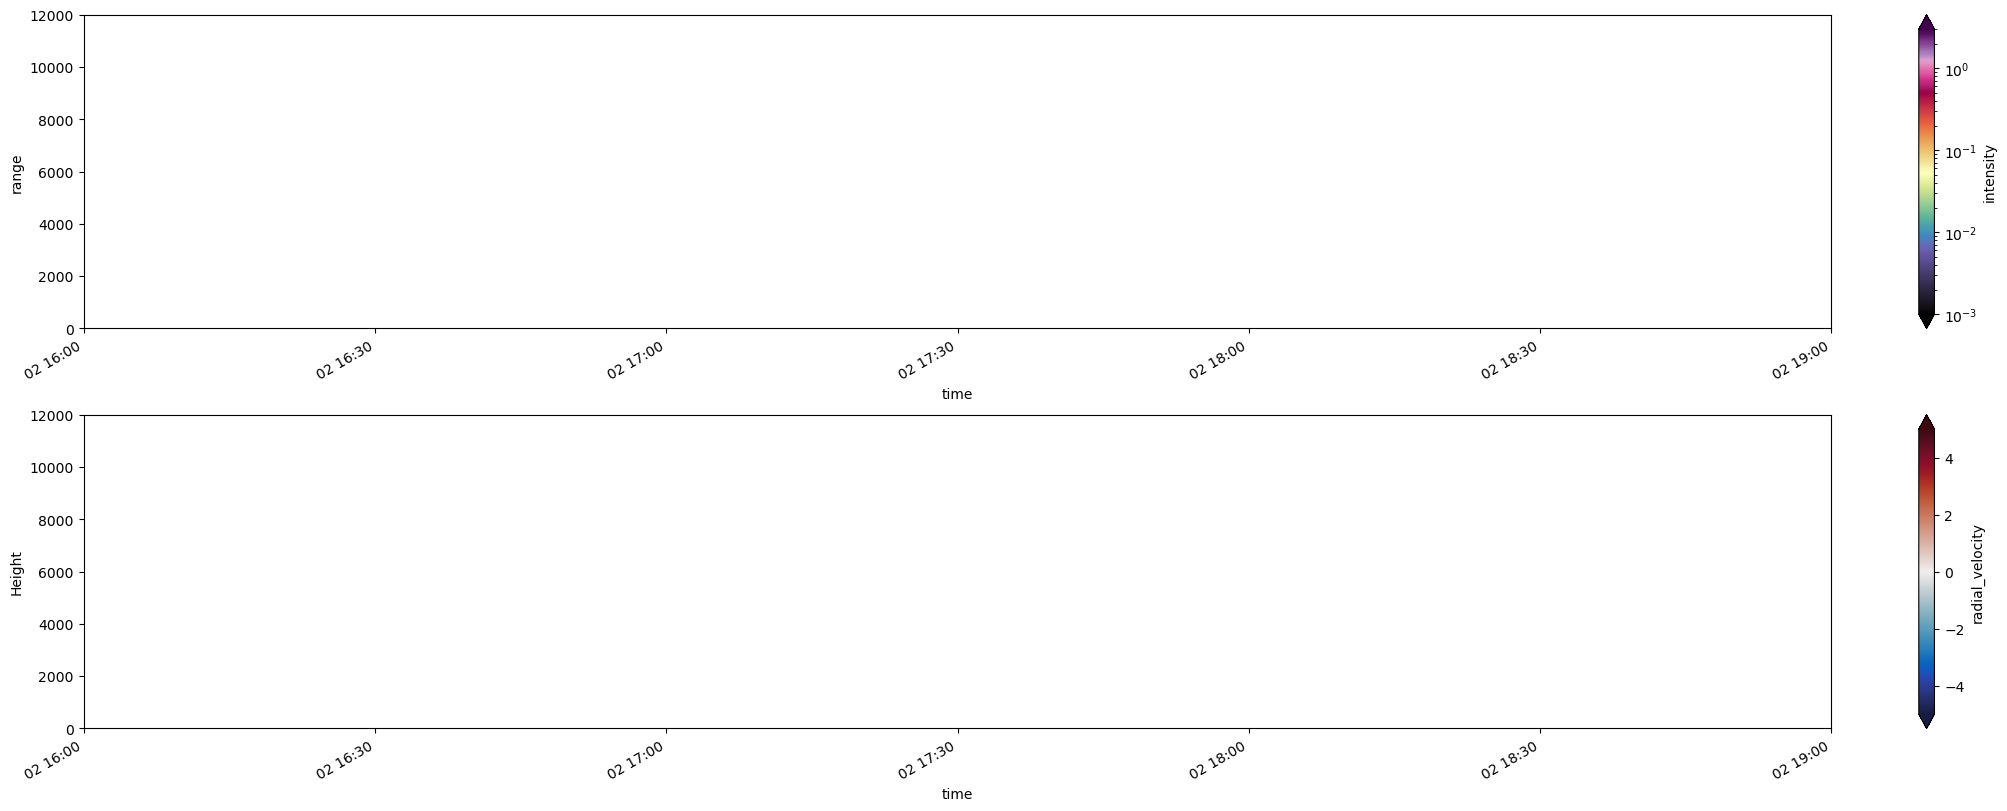

In [6]:
time1 = pd.Timestamp("2023-08-02 16:00:00")
time2 = pd.Timestamp("2023-08-02 19:00:00")

toa = 12000.0
vrange = 5
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[20,8], constrained_layout=True)

(ds_ingested.intensity -1.).sortby(ds_ingested.time).plot.pcolormesh(norm=LogNorm(vmax=3, vmin=0.001),
                                     cmap=pyart.graph.cm_colorblind.ChaseSpectral, ax=axs[0])


plt.ylabel("Height")
axs[0].set_ylim([0,toa])
axs[0].set_xlim([time1, time2])

ds_ingested.radial_velocity.sortby(ds_ingested.time).plot.pcolormesh( cmap=pyart.graph.cm_colorblind.balance, 
                                                                   vmin=-vrange, vmax=vrange, ax=axs[1])
axs[1].set_ylim([0,toa])
axs[1].set_xlim([time1, time2])

plt.ylabel("Height")
plt.savefig('/Users/scollis/zdllatest.png')

In [2]:
files = glob.glob('/Volumes/T7/data/DL_ingested/crocus-neiu-*.nc')
files.sort()

In [3]:
files

['/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307010000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307020000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307030000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307040000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307050000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307060000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307070000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307101322.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307110000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307120000.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307131842.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307141359.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307150002.nc',
 '/Volumes/T7/data/DL_ingested/crocus-neiu-dlvpt-a1-202307160002.nc',
 '/Volumes/T7/data/D

In [4]:
ds_ingested = act.io.read_netcdf(files)

In [1]:
time1 = None#pd.Timestamp("2023-06-27 12:00:00")
time2 = None#pd.Timestamp("2023-06-27 20:00:00")

toa = 6000.0
vrange = 5
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[20,8], constrained_layout=True)

(ds_ingested.intensity -1.).sortby(ds_ingested.time).plot.pcolormesh(norm=LogNorm(vmax=3, vmin=0.001),
                                     cmap=pyart.graph.cm_colorblind.ChaseSpectral, ax=axs[0])


plt.ylabel("Height")
axs[0].set_ylim([0,toa])
axs[0].set_xlim([time1, time2])

ds_ingested.radial_velocity.sortby(ds_ingested.time).plot.pcolormesh( cmap=pyart.graph.cm_colorblind.balance, 
                                                                   vmin=-vrange, vmax=vrange, ax=axs[1])
axs[1].set_ylim([0,toa])
axs[1].set_xlim([time1, time2])

plt.ylabel("Height")
plt.savefig('/Users/scollis/dllatest-long.png')

NameError: name 'plt' is not defined